# Lung Cancer Dataset - EDA
---

Luis Angel Garcia (2230177)  
Antonio Cardenas Jurado (2230433)  
Juliana Del Toro ()  


## Libraries


In [33]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Mysql Config And Connection

In [40]:
config = {"host":"localhost","port":3306,"user": "root", "password":"","database":"lung_cancer"}

csv_file= './DATASET/lung_cancer_prediction_dataset.csv'

conn = mysql.connector.connect(host=config["host"],port=config["port"], user=config["user"], password=config["password"])
cursor= conn.cursor()

## Database And Table Create 

In [41]:
cursor.execute(f"CREATE DATABASE IF NOT EXISTS {config['database']}")
conn.database = config["database"]

## Dirt DATASET Load

In [42]:
cursor.execute(""" 
CREATE TABLE IF NOT EXISTS lung_cancer_dirty (
    id INT AUTO_INCREMENT NOT NULL PRIMARY KEY,
    Country VARCHAR(255),
    Population_Size INT,
    Age INT,
    Gender VARCHAR(20),
    Smoker VARCHAR(20),
    Years_of_Smoking INT,
    Cigarettes_per_Day INT,
    Passive_Smoker VARCHAR(20),
    Family_History VARCHAR(20),
    Lung_Cancer_Diagnosis VARCHAR(20),
    Cancer_Stage VARCHAR(20),
    Survival_Years INT,
    Adenocarcinoma_Type VARCHAR(20),
    Air_Pollution_Exposure VARCHAR(20),
    Occupational_Exposure VARCHAR(20),
    Indoor_Pollution VARCHAR(20),
    Healthcare_Access VARCHAR(20),
    Early_Detection VARCHAR(20),
    Treatment_Type VARCHAR(20),
    Developed_or_Developing VARCHAR(20),
    Annual_Lung_Cancer_Deaths INT,
    Lung_Cancer_Prevalence_Rate FLOAT,
    Mortality_Rate FLOAT);
""")

conn.commit()
print ("La base de datos y tabla se ha creado con exito")

df = pd.read_csv(csv_file)
df = df.fillna("TEMP_NULL") 

cursor.execute("SELECT COUNT(*) FROM lung_cancer_dirty")
resultado = cursor.fetchone()
if resultado[0] == 0:
    for _, row in df.iterrows():
        cursor.execute("""
                   INSERT INTO lung_cancer_dirty (Country, Population_Size, Age,Gender, Smoker, Years_of_Smoking, Cigarettes_per_Day, Passive_Smoker, Family_History, Lung_Cancer_Diagnosis, Cancer_Stage, Survival_Years, Adenocarcinoma_Type, Air_Pollution_Exposure, Occupational_Exposure, Indoor_Pollution, Healthcare_Access, Early_Detection, Treatment_Type, Developed_or_Developing, Annual_Lung_Cancer_Deaths, Lung_Cancer_Prevalence_Rate, Mortality_Rate)
                   VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
                """, (row['Country'],row['Population_Size'],row['Age'],row['Gender'],row['Smoker'],row['Years_of_Smoking'],row['Cigarettes_per_Day'],row['Passive_Smoker'],row['Family_History'],row['Lung_Cancer_Diagnosis'],row['Cancer_Stage'],row['Survival_Years'],row['Adenocarcinoma_Type'],row['Air_Pollution_Exposure'],row['Occupational_Exposure'],row['Indoor_Pollution'],row['Healthcare_Access'],row['Early_Detection'],row['Treatment_Type'],row['Developed_or_Developing'],row['Annual_Lung_Cancer_Deaths'],row['Lung_Cancer_Prevalence_Rate'],row['Mortality_Rate']))
    conn.commit()
    print("Dato cargados correcctamente")
else:
    conn.commit()
    print("No es necesario volver a cargar los datos")

La base de datos y tabla se ha creado con exito
No es necesario volver a cargar los datos


Se cambio los nulos por "TEMP_NULL" para poder realizar la carga de los datos

## DATABASE Annalysis

## Use database from mysql

In [43]:
cursor.execute("SELECT * FROM lung_cancer_dirty")

columns = [col[0] for col in cursor.description]
datas= cursor.fetchall()
df = pd.DataFrame(datas, columns=columns)

## Analisamos las primeras filas

In [45]:
print("\nPrimeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
   id       Country  Population_Size  Age  Gender Smoker  Years_of_Smoking  \
0   1         China             1400   80    Male    Yes                30   
1   2          Iran               84   53    Male     No                 0   
2   3        Mexico              128   47    Male    Yes                12   
3   4     Indonesia              273   39  Female     No                 0   
4   5  South Africa               59   44  Female     No                 0   

   Cigarettes_per_Day Passive_Smoker Family_History  ...  \
0                  29             No             No  ...   
1                   0            Yes             No  ...   
2                   6            Yes             No  ...   
3                   0             No            Yes  ...   
4                   0            Yes             No  ...   

  Air_Pollution_Exposure Occupational_Exposure  Indoor_Pollution  \
0                    Low                   Yes                No   
1    

## Informacion general

In [46]:
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 220632 non-null  object 
 12  Survival_Years               220

## Valores Nulos

In [47]:
nulos=(df == "TEMP_NULL").sum()
print(f'Los nulos de cada columna son:', nulos )

Los nulos de cada columna son: id                                  0
Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211671
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 213968
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64


## Valores duplicados

In [48]:
print("\nCantidad de filas duplicadas:", df.duplicated().sum())


Cantidad de filas duplicadas: 0


## Valores Unicos

In [49]:
print("\nValores únicos en la columna 'Gender':", df['Gender'].unique())
print("Valores únicos en la columna 'Smoker':", df['Smoker'].unique())
print("Valores únicos en la columna 'Passive_Smoker':", df['Passive_Smoker'].unique())
print("Valores únicos en la columna 'Family_History':", df['Family_History'].unique())
print("Valores únicos en la columna 'Lung_Cancer_Diagnosis':", df['Lung_Cancer_Diagnosis'].unique())
print("Valores únicos en la columna 'Cancer_Stage':", df['Cancer_Stage'].unique())
print("Valores únicos en la columna 'Adenocarcinoma_Type':", df['Adenocarcinoma_Type'].unique())
print("Valores únicos en la columna 'Air_pollution_exposure':", df['Air_Pollution_Exposure'].unique())
print("Valores únicos en la columna 'Occupational_Exposure':", df['Occupational_Exposure'].unique())
print("Valores únicos en la columna 'Indoor_pollution':", df['Indoor_Pollution'].unique())
print("Valores únicos en la columna 'Healtcare_Access':", df['Healthcare_Access'].unique())
print("Valores únicos en la columna 'Early_Detection':", df['Early_Detection'].unique())
print("Valores únicos en la columna 'Developed_or_Developing':", df['Developed_or_Developing'].unique())


Valores únicos en la columna 'Gender': ['Male' 'Female']
Valores únicos en la columna 'Smoker': ['Yes' 'No']
Valores únicos en la columna 'Passive_Smoker': ['No' 'Yes']
Valores únicos en la columna 'Family_History': ['No' 'Yes']
Valores únicos en la columna 'Lung_Cancer_Diagnosis': ['No' 'Yes']
Valores únicos en la columna 'Cancer_Stage': ['TEMP_NULL' 'Stage 1' 'Stage 2' 'Stage 3' 'Stage 4']
Valores únicos en la columna 'Adenocarcinoma_Type': ['Yes' 'No']
Valores únicos en la columna 'Air_pollution_exposure': ['Low' 'Medium' 'High']
Valores únicos en la columna 'Occupational_Exposure': ['Yes' 'No']
Valores únicos en la columna 'Indoor_pollution': ['No' 'Yes']
Valores únicos en la columna 'Healtcare_Access': ['Poor' 'Good']
Valores únicos en la columna 'Early_Detection': ['No' 'Yes']
Valores únicos en la columna 'Developed_or_Developing': ['Developing' 'Developed']


## Verificacion cigarrillos por dia

In [50]:
min_cigarettes = df["Cigarettes_per_Day"].min()
max_cigarettes = df["Cigarettes_per_Day"].max()

print(f"\nLos minimos cigarrillos al dia encontrados fueron: ",min_cigarettes)
print(f"Los maximos cigarrillos al dia encontrados fueron: ",max_cigarettes)

smokers = (df["Cigarettes_per_Day"] > 0).sum()
print(f"\nNúmero de personas que fuman son fumadoras: {smokers}")

df_smokers = df[df["Cigarettes_per_Day"]>0]

q1 = df_smokers["Cigarettes_per_Day"].quantile(0.25)
q3 = df_smokers["Cigarettes_per_Day"].quantile(0.75)
iqr=q3-q1

limit_inf = max(1, q1- 1.5 * iqr)
limit_sup = q3 + 1.5 * iqr

atipic_value= df_smokers[(df_smokers["Cigarettes_per_Day"] < limit_inf) | (df_smokers["Cigarettes_per_Day"]>limit_sup)]

print(f"\nQ1: {q1}, Q3: {q3}, IQR: {iqr}")
print(f"Límite inferior ajustado: {limit_inf}")
print(f"Límite superior: {limit_sup}")
print(f"Número de valores atípicos: {atipic_value.shape[0]}")



Los minimos cigarrillos al dia encontrados fueron:  0
Los maximos cigarrillos al dia encontrados fueron:  30

Número de personas que fuman son fumadoras: 88341

Q1: 11.0, Q3: 24.0, IQR: 13.0
Límite inferior ajustado: 1
Límite superior: 43.5
Número de valores atípicos: 0


Los valores Maximos de cigarrillos por dia pueden son un poco altos, se decidio conocer el limte superiore

## Verificacion de edad

In [51]:
age_max = df["Age"].max()
age_min = df["Age"].min()
print(f"\nLa edad maxima es: ", age_max)
print(f"La edad minima es: ", age_min)


La edad maxima es:  85
La edad minima es:  20


## Selecion de columnas

In [52]:
query = "SELECT * FROM lung_cancer_dirty"

df = pd.read_sql(query, conn)

df_selected = df[["id","Age","Country","Lung_Cancer_Prevalence_Rate","Smoker","Years_of_Smoking","Cigarettes_per_Day","Passive_Smoker","Lung_Cancer_Diagnosis","Healthcare_Access","Early_Detection","Survival_Years","Developed_or_Developing","Mortality_Rate","Annual_Lung_Cancer_Deaths","Air_Pollution_Exposure","Occupational_Exposure","Indoor_Pollution","Family_History","Treatment_Type","Cancer_Stage"]]
print(df_selected.info())

C:\Users\Luis Garcia\AppData\Local\Temp\ipykernel_21020\3878510028.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           220632 non-null  int64  
 1   Age                          220632 non-null  int64  
 2   Country                      220632 non-null  object 
 3   Lung_Cancer_Prevalence_Rate  220632 non-null  float64
 4   Smoker                       220632 non-null  object 
 5   Years_of_Smoking             220632 non-null  int64  
 6   Cigarettes_per_Day           220632 non-null  int64  
 7   Passive_Smoker               220632 non-null  object 
 8   Lung_Cancer_Diagnosis        220632 non-null  object 
 9   Healthcare_Access            220632 non-null  object 
 10  Early_Detection              220632 non-null  object 
 11  Survival_Years               220632 non-null  int64  
 12  Developed_or_Developing      220632 non-null  object 
 13 

## Limpieza de nulos

In [53]:
nulos=(df_selected == "TEMP_NULL").sum()
print(f'Antes los nulos de cada columna son:', nulos )

df_selected.replace("TEMP_NULL", None, inplace=True)

nulos=(df_selected == "TEMP_NULL").sum()
print(f'Despues los nulos de cada columna son:', nulos )

Antes los nulos de cada columna son: id                                  0
Age                                 0
Country                             0
Lung_Cancer_Prevalence_Rate         0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Lung_Cancer_Diagnosis               0
Healthcare_Access                   0
Early_Detection                     0
Survival_Years                      0
Developed_or_Developing             0
Mortality_Rate                      0
Annual_Lung_Cancer_Deaths           0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Family_History                      0
Treatment_Type                 213968
Cancer_Stage                   211671
dtype: int64
Despues los nulos de cada columna son: id                             0
Age                            0
Country                        0
Lung_Cancer_Pr

C:\Users\Luis Garcia\AppData\Local\Temp\ipykernel_21020\4075066962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.replace("TEMP_NULL", None, inplace=True)


## Convercion a boleanos

In [54]:
df_selected["Early_Detection"] = df_selected["Early_Detection"].map({"Yes": True, "No": False})
df_selected["Smoker"] = df_selected["Smoker"].map({"Yes": True, "No": False})
df_selected["Passive_Smoker"] = df_selected["Passive_Smoker"].map({"Yes": True, "No": False})
df_selected["Lung_Cancer_Diagnosis"] = df_selected["Lung_Cancer_Diagnosis"].map({"Yes": True, "No": False})
df_selected["Occupational_Exposure"] = df_selected["Occupational_Exposure"].map({"Yes": True, "No": False})
df_selected["Indoor_Pollution"] = df_selected["Indoor_Pollution"].map({"Yes": True, "No": False})
df_selected["Family_History"] = df_selected["Family_History"].map({"Yes": True, "No": False})
print(df_selected.info)

C:\Users\Luis Garcia\AppData\Local\Temp\ipykernel_21020\2632223064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Early_Detection"] = df_selected["Early_Detection"].map({"Yes": True, "No": False})
C:\Users\Luis Garcia\AppData\Local\Temp\ipykernel_21020\2632223064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Smoker"] = df_selected["Smoker"].map({"Yes": True, "No": False})
C:\Users\Luis Garcia\AppData\Local\Temp\ipykernel_21020\2632223064.py:3: SettingWithCopyWarning: 
A 

<bound method DataFrame.info of             id  Age       Country  Lung_Cancer_Prevalence_Rate  Smoker  \
0            1   80         China                         2.44    True   
1            2   53          Iran                         2.10   False   
2            3   47        Mexico                         1.11    True   
3            4   39     Indonesia                         0.75   False   
4            5   44  South Africa                         2.44   False   
...        ...  ...           ...                          ...     ...   
220627  220628   55      Thailand                         0.70    True   
220628  220629   66  South Africa                         0.78   False   
220629  220630   46       Vietnam                         1.16   False   
220630  220631   36      Ethiopia                         1.06   False   
220631  220632   60       Germany                         1.07   False   

        Years_of_Smoking  Cigarettes_per_Day  Passive_Smoker  \
0              

## Carga de dataset limpio a MySQL

In [55]:
cursor.execute(""" 
CREATE TABLE IF NOT EXISTS lung_cancer_cleaned (
               id INT AUTO_INCREMENT NOT NULL PRIMARY KEY,
               Age INT,
               Country VARCHAR(20),
               Lung_Cancer_Prevalence_Rate FLOAT,
               Smoker BOOLEAN,
               Years_of_Smoking INT,
               Cigarettes_per_Day INT,
               Passive_Smoker BOOLEAN,
               Lung_Cancer_Diagnosis BOOLEAN,
               Healthcare_Access VARCHAR(20),
               Early_Detection BOOLEAN,
               Survival_Years INT,
               Developed_or_Developing VARCHAR(20),
               Mortality_Rate FLOAT,
               Annual_Lung_Cancer_Deaths INT,
               Air_Pollution_Exposure VARCHAR(20),
               Occupational_Exposure BOOLEAN,
               Indoor_Pollution BOOLEAN,
               Family_History BOOLEAN,
               Treatment_Type VARCHAR(20),
               Cancer_Stage VARCHAR(20));
""")

cursor.execute("SELECT COUNT(*) FROM lung_cancer_cleaned")
resultado = cursor.fetchone()
if resultado[0] == 0:
    for _, row in df_selected.iterrows():
        cursor.execute("""
                   INSERT INTO lung_cancer_cleaned (Age,Country,Lung_Cancer_Prevalence_Rate,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Lung_Cancer_Diagnosis,Healthcare_Access,Early_Detection,Survival_Years,Developed_or_Developing,Mortality_Rate,Annual_Lung_Cancer_Deaths,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Family_History,Treatment_Type,Cancer_Stage)
                   VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
                """, (row['Age'],row['Country'],row['Lung_Cancer_Prevalence_Rate'],row['Smoker'],row['Years_of_Smoking'],row['Cigarettes_per_Day'],row['Passive_Smoker'],row['Lung_Cancer_Diagnosis'],row['Healthcare_Access'],row['Early_Detection'],row['Survival_Years'],row['Developed_or_Developing'],row['Mortality_Rate'],row['Annual_Lung_Cancer_Deaths'],row['Air_Pollution_Exposure'],row['Occupational_Exposure'],row['Indoor_Pollution'],row['Family_History'],row['Treatment_Type'],row['Cancer_Stage']))
    conn.commit()
    print("Dato cargados correcctamente")
else:
    conn.commit()
    print("No es necesario volver a cargar los datos")

Dato cargados correcctamente


## Vizualizaciones 

Casos positivos por pais

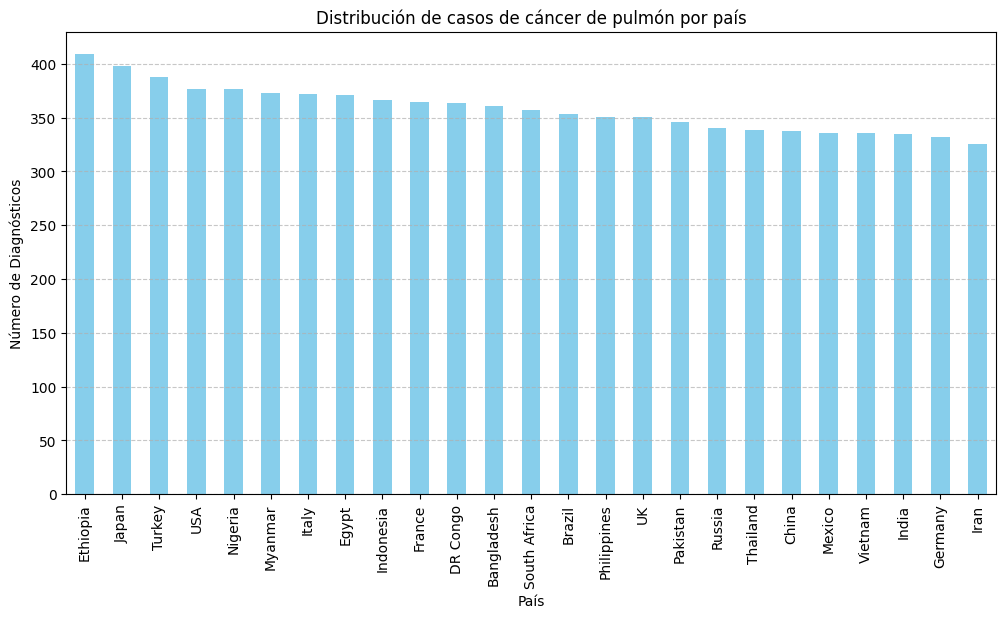

In [58]:
diagnostics_by_country = df_selected[df_selected["Lung_Cancer_Diagnosis"] == True]["Country"].value_counts()

plt.figure(figsize=(12, 6))
diagnostics_by_country.plot(kind="bar", color="skyblue")
plt.xlabel("País")
plt.ylabel("Número de Diagnósticos")
plt.title("Distribución de casos de cáncer de pulmón por país")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Casos positivos segun si fuman o no

<Figure size 800x500 with 0 Axes>

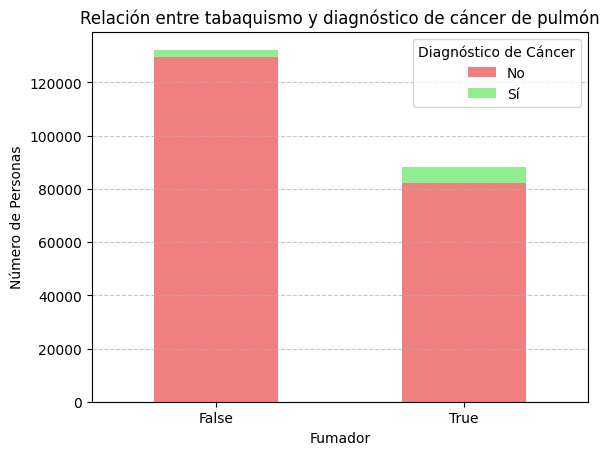

In [59]:
smoking_diagnosis = df_selected.groupby("Smoker")["Lung_Cancer_Diagnosis"].value_counts().unstack()

plt.figure(figsize=(8, 5))
smoking_diagnosis.plot(kind="bar", stacked=True, color=["lightcoral", "lightgreen"])
plt.xlabel("Fumador")
plt.ylabel("Número de Personas")
plt.title("Relación entre tabaquismo y diagnóstico de cáncer de pulmón")
plt.legend(["No", "Sí"], title="Diagnóstico de Cáncer")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.show()


dispersión entre años de tabaquismo y diagnóstico

C:\Users\Luis Garcia\AppData\Local\Temp\ipykernel_21020\313320081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Lung_Cancer_Diagnosis"], y=df_selected["Years_of_Smoking"], palette={"No": "lightgreen", "Yes": "lightcoral"})


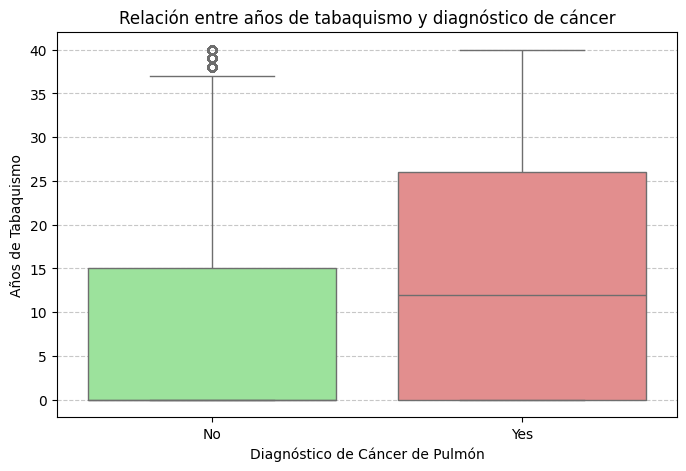

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Lung_Cancer_Diagnosis"], y=df_selected["Years_of_Smoking"], palette={"No": "lightgreen", "Yes": "lightcoral"})
plt.xlabel("Diagnóstico de Cáncer de Pulmón")
plt.ylabel("Años de Tabaquismo")
plt.title("Relación entre años de tabaquismo y diagnóstico de cáncer")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Revisar

<Figure size 800x500 with 0 Axes>

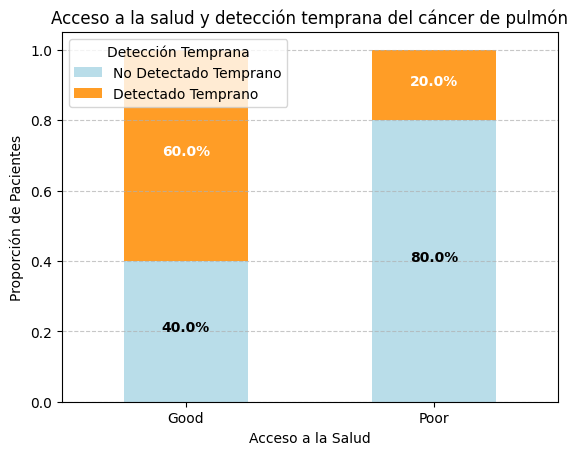

In [61]:
healthcare_detection = df_selected.groupby("Healthcare_Access")["Early_Detection"].value_counts().unstack()

healthcare_detection_norm = healthcare_detection.div(healthcare_detection.sum(axis=1), axis=0)

plt.figure(figsize=(8, 5))
healthcare_detection_norm.plot(kind="bar", stacked=True, color=["lightblue", "darkorange"], alpha=0.85)

plt.xlabel("Acceso a la Salud")
plt.ylabel("Proporción de Pacientes")
plt.title("Acceso a la salud y detección temprana del cáncer de pulmón")
plt.legend(["No Detectado Temprano", "Detectado Temprano"], title="Detección Temprana")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)

for i, (no_det, si_det) in enumerate(zip(healthcare_detection_norm[False], healthcare_detection_norm[True])):
    plt.text(i, no_det / 2, f"{no_det:.1%}", ha="center", fontsize=10, color="black", weight="bold")
    plt.text(i, no_det + si_det / 2, f"{si_det:.1%}", ha="center", fontsize=10, color="white", weight="bold")

plt.show()

## Tasa de mortalidad segun la etapa del cancer

C:\Users\Luis Garcia\AppData\Local\Temp\ipykernel_21020\2454329364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mortality_by_stage.index, y=mortality_by_stage.values, palette="Reds_r")


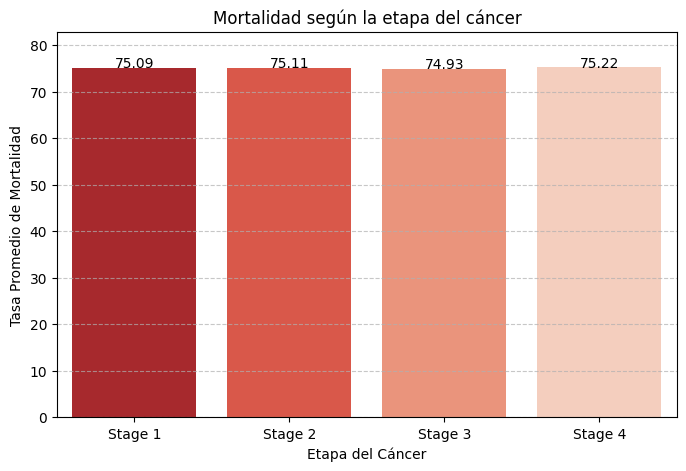

In [62]:
mortality_by_stage = df_selected.groupby("Cancer_Stage")["Mortality_Rate"].mean().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=mortality_by_stage.index, y=mortality_by_stage.values, palette="Reds_r")

plt.xlabel("Etapa del Cáncer")
plt.ylabel("Tasa Promedio de Mortalidad")
plt.title("Mortalidad según la etapa del cáncer")
plt.ylim(0, mortality_by_stage.max() * 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.7)


for i, value in enumerate(mortality_by_stage.values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha="center", fontsize=10, color="black")

## Diagnostico de cancer segun el nivel de contaminacion del aire

<Figure size 800x500 with 0 Axes>

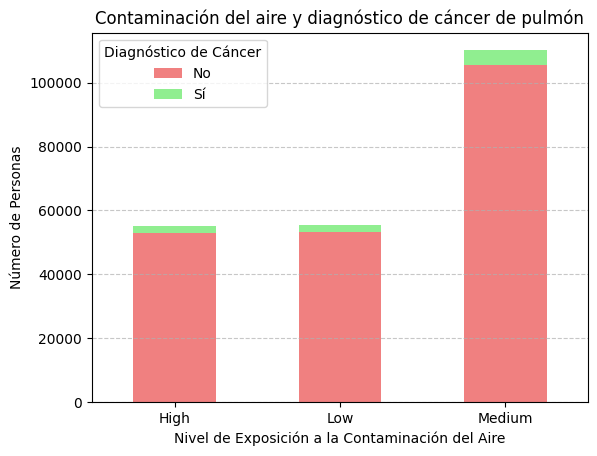

In [63]:
pollution_diagnosis = df_selected.groupby("Air_Pollution_Exposure")["Lung_Cancer_Diagnosis"].value_counts().unstack()

plt.figure(figsize=(8, 5))
pollution_diagnosis.plot(kind="bar", stacked=True, color=["lightcoral", "lightgreen"])
plt.xlabel("Nivel de Exposición a la Contaminación del Aire")
plt.ylabel("Número de Personas")
plt.title("Contaminación del aire y diagnóstico de cáncer de pulmón")
plt.legend(["No", "Sí"], title="Diagnóstico de Cáncer")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.show()


## Tasa de mortalidad entre paises desarrollados y en desarrollo

C:\Users\Luis Garcia\AppData\Local\Temp\ipykernel_21020\208216223.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mortality_by_dev_status.index, y=mortality_by_dev_status.values, palette=["blue", "orange"], alpha=0.85)


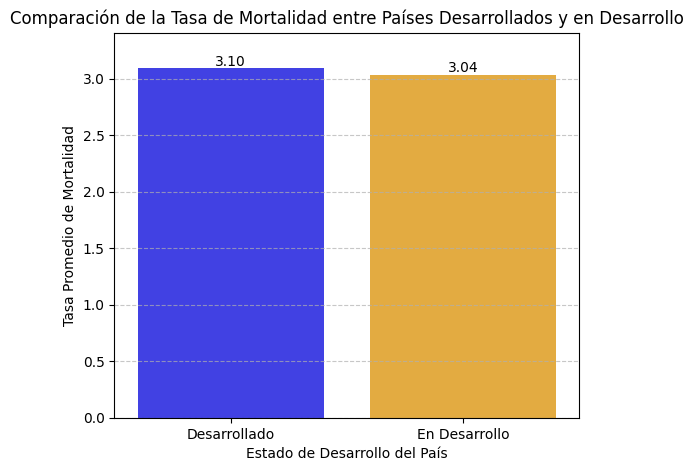

In [64]:
developed_countries = ["USA", "Canada", "Germany", "UK", "France", "Australia", "Japan"]
df["Development_Status"] = df["Country"].apply(lambda x: "Desarrollado" if x in developed_countries else "En Desarrollo")

mortality_by_dev_status = df.groupby("Development_Status")["Mortality_Rate"].mean()

plt.figure(figsize=(6, 5))
sns.barplot(x=mortality_by_dev_status.index, y=mortality_by_dev_status.values, palette=["blue", "orange"], alpha=0.85)

plt.xlabel("Estado de Desarrollo del País")
plt.ylabel("Tasa Promedio de Mortalidad")
plt.title("Comparación de la Tasa de Mortalidad entre Países Desarrollados y en Desarrollo")
plt.ylim(0, mortality_by_dev_status.max() * 1.1) 
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)

for i, value in enumerate(mortality_by_dev_status.values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha="center", fontsize=10, color="black")

plt.show()

## Cerramos conexion

In [65]:
cursor.close()
conn.close()